# L11 波士顿房价预测模型

这周的课我们需要做的就是预测波士顿房价。我们可以找到的数据集如下：

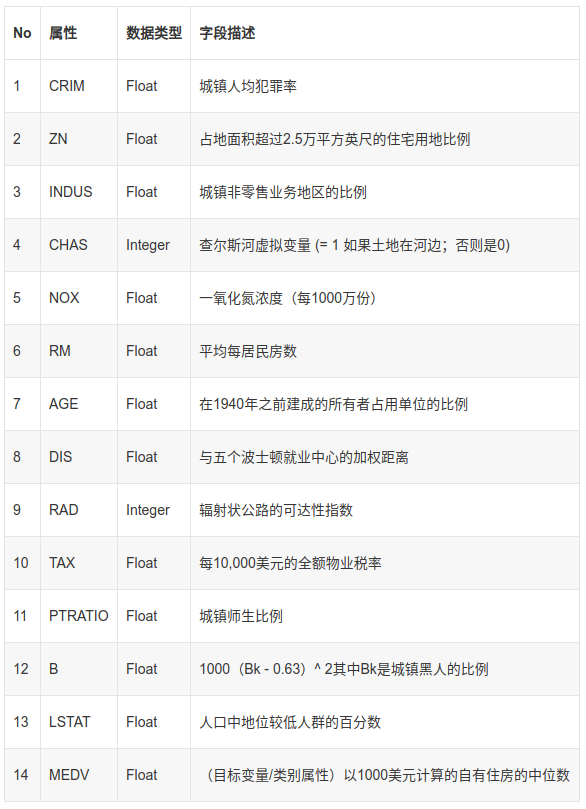

这是美国人口普查局收集的美国马萨诸塞州波士顿住房价格的有关信息，数据集不大，只有506条记录，13个特征，没有缺失值。

现在我们开始解决这个问题。

## 0. 数据集的基本情况

In [216]:
import pandas as pd
import matplotlib.pyplot as plt

dataset_filename = '../datasets/boston.csv'

# 读取数据集
df = pd.read_csv(dataset_filename)

# 查看数据集的基本情况
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [217]:
# 查看数据集的前若干行
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [218]:
# 查看数值属性的摘要信息
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647422,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


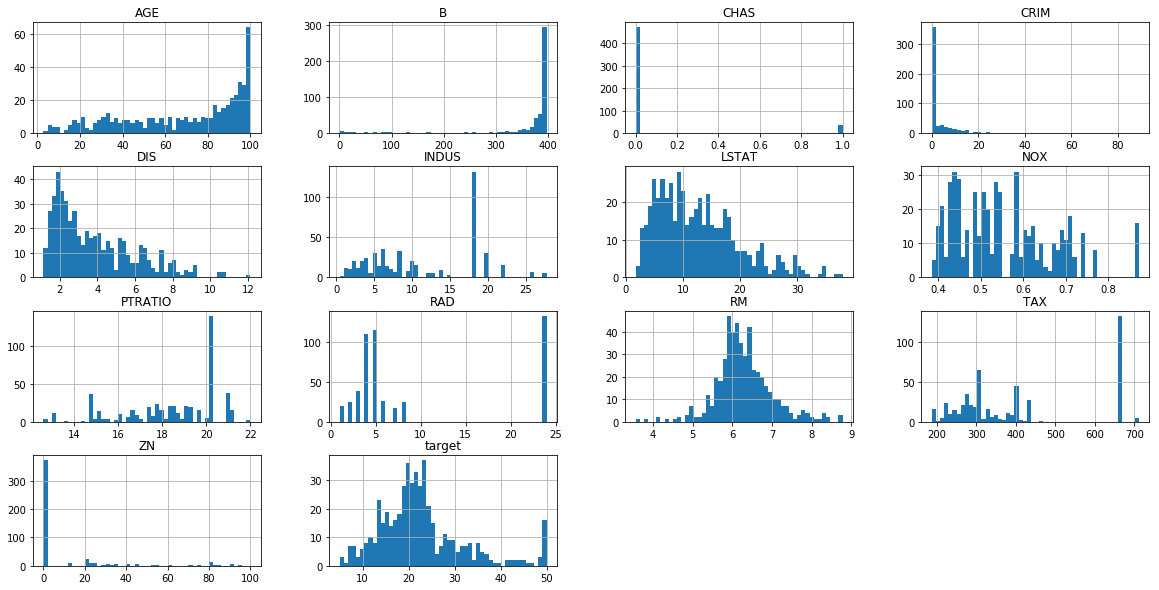

In [220]:
# 查看数据的分布
df.hist(bins=50, figsize=(20, 10))
plt.show()

## 1. 相关性分析

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

dataset_filename = '../datasets/boston.csv'

# 读取数据集
df = pd.read_csv(dataset_filename)

# 计算特征与目标的相关性
# 小数据集可以这样计算
corr = df.corr()
print(corr['target'].sort_values(ascending=False))

target     1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.385832
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: target, dtype: float64


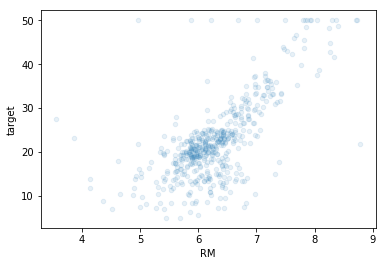

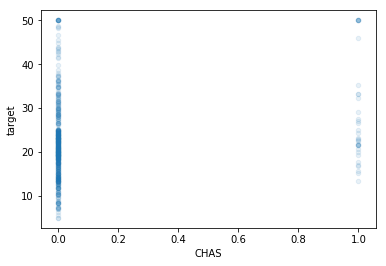

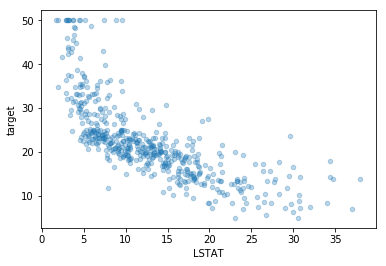

In [17]:
# 相关性散点图
df.plot(kind='scatter', x='RM', y='target', alpha=0.1)
plt.show()
df.plot(kind='scatter', x='CHAS', y='target', alpha=0.1)
plt.show()
df.plot(kind='scatter', x='LSTAT', y='target', alpha=0.3)
plt.show()

## 2. 特征分析

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

dataset_filename = '../datasets/boston.csv'

# 读取数据集
df = pd.read_csv(dataset_filename)

# 随机拆分: random_state
print("第1次split, random_state=2:")
train_set, test_set = train_test_split(df, test_size=0.5, random_state=2)
train_set.head()

第1次split, random_state=2:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
237,0.51183,0.0,6.20,0,0.507,7.358,71.6,4.1480,8,307,17.4,390.07,4.73,31.5
265,0.76162,20.0,3.97,0,0.647,5.560,62.8,1.9865,5,264,13.0,392.40,10.45,22.8
388,14.33370,0.0,18.10,0,0.700,4.880,100.0,1.5895,24,666,20.2,372.92,30.62,10.2
74,0.07896,0.0,12.83,0,0.437,6.273,6.0,4.2515,5,398,18.7,394.92,6.78,24.1
243,0.12757,30.0,4.93,0,0.428,6.393,7.8,7.0355,6,300,16.6,374.71,5.19,23.7


In [41]:
print("第2次split, random_state=2:")
train_set, test_set = train_test_split(df, test_size=0.5, random_state=2)
train_set.head()

第2次split, random_state=2:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
237,0.51183,0.0,6.20,0,0.507,7.358,71.6,4.1480,8,307,17.4,390.07,4.73,31.5
265,0.76162,20.0,3.97,0,0.647,5.560,62.8,1.9865,5,264,13.0,392.40,10.45,22.8
388,14.33370,0.0,18.10,0,0.700,4.880,100.0,1.5895,24,666,20.2,372.92,30.62,10.2
74,0.07896,0.0,12.83,0,0.437,6.273,6.0,4.2515,5,398,18.7,394.92,6.78,24.1
243,0.12757,30.0,4.93,0,0.428,6.393,7.8,7.0355,6,300,16.6,374.71,5.19,23.7


In [42]:
print("第3次split:")
train_set, test_set = train_test_split(df, test_size=0.5)
train_set.head()

第3次split:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04,23.6
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
268,0.54050,20.0,3.97,0,0.575,7.470,52.6,2.8720,5,264,13.0,390.30,3.16,43.5
119,0.14476,0.0,10.01,0,0.547,5.731,65.2,2.7592,6,432,17.8,391.50,13.61,19.3
202,0.02177,82.5,2.03,0,0.415,7.610,15.7,6.2700,2,348,14.7,395.38,3.11,42.3


In [222]:
print("第4次split:")
train_set, test_set = train_test_split(df, test_size=0.5)
train_set.head()

第4次split:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
341,0.01301,35.0,1.52,0,0.442,7.241,49.3,7.0379,1,284,15.5,394.74,5.49,32.7
484,2.37857,0.0,18.10,0,0.583,5.871,41.9,3.7240,24,666,20.2,370.73,13.34,20.6
355,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,376.04,5.57,20.6
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
250,0.14030,22.0,5.86,0,0.431,6.487,13.0,7.3967,7,330,19.1,396.28,5.90,24.4


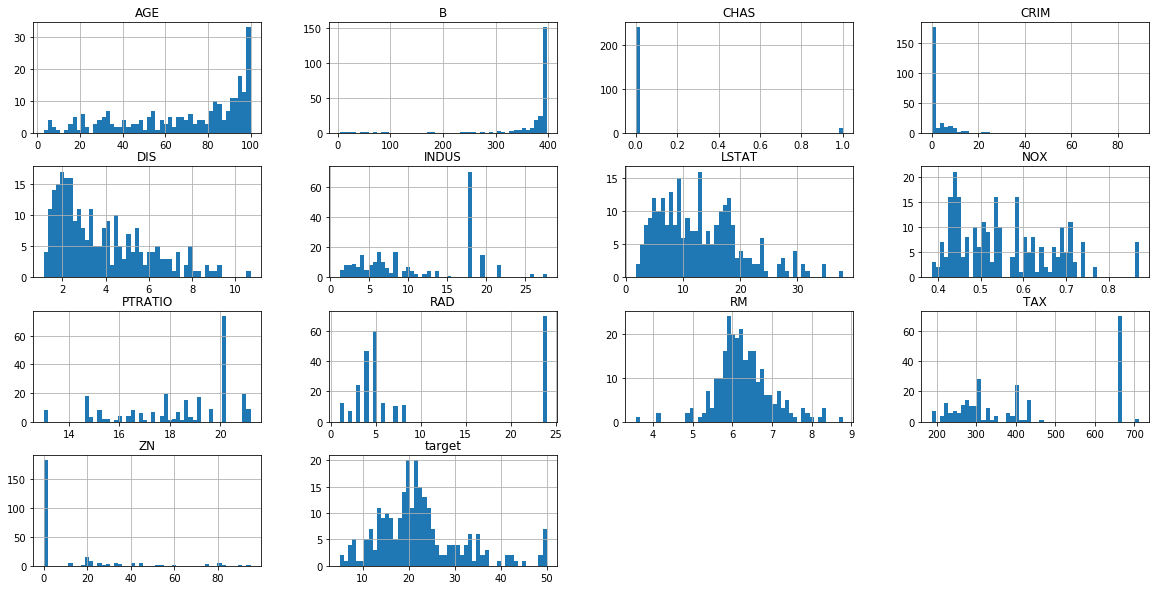

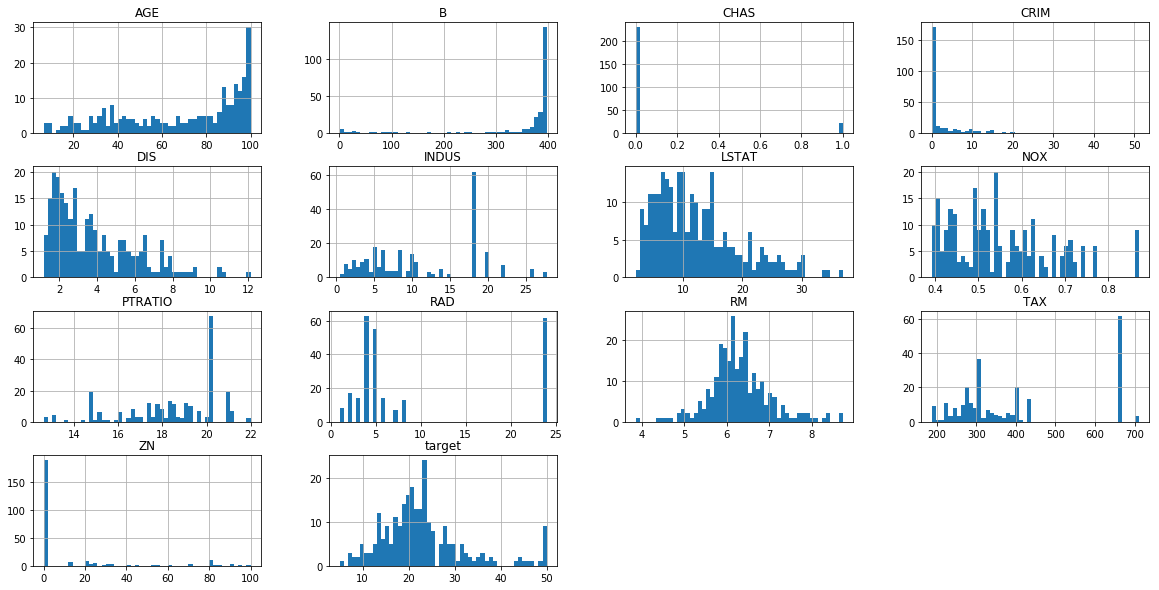

随机split时，特征分布并不一定均匀


In [44]:
# 查看特征分布是否均匀
train_set.hist(bins=50, figsize=(20, 10))
plt.show()
test_set.hist(bins=50, figsize=(20, 10))
plt.show()
print("随机split时，特征分布并不一定均匀")

In [48]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

## 3. 构建线性回归模型
### 3.1 单变量线性回归模型

In [225]:
from sklearn.linear_model import LinearRegression as lr

# 先从一个特征变量开始
train_set, test_set = train_test_split(df, test_size=0.4, random_state=2)
train_x = pd.DataFrame(train_set, columns=['LSTAT'])
train_y = pd.DataFrame(train_set, columns=['target'])

test_x = pd.DataFrame(test_set, columns=['LSTAT'])
test_y = pd.DataFrame(test_set, columns=['target'])

# 主要参数：
# fit_intercept：是否计算此模型的截距。如果设置为False，则不会在计算中使用截距（默认计算截距）。
# normalize：当``fit_intercept``设置为False时，将忽略此参数。如果为真，则变量X将在回归之前通过减去平均值并除以l2范数来归一化。
model = lr()
model.fit(train_x, train_y)
print(model.coef_, model.intercept_)

[[-0.90157949]] [33.63096253]


In [226]:
# model.coef_, model.intercept_：这两个参数是什么意思
print(test_x[:5]) 
print(model.predict(test_x[:5]))

print([x * model.coef_ + model.intercept_ for x in test_x['LSTAT'][:5]])

     LSTAT
463  10.29
152  12.12
291   3.56
183   5.68
384  30.63
[[24.35370962]
 [22.70381916]
 [30.42133956]
 [28.50999105]
 [ 6.01558287]]
[array([[24.35370962]]), array([[22.70381916]]), array([[30.42133956]]), array([[28.50999105]]), array([[6.01558287]])]


In [227]:
from sklearn.metrics import mean_absolute_error

pred_y = model.predict(train_x)
print("训练误差：", mean_squared_error(train_y, pred_y))

pred_y = model.predict(test_x)
print("测试误差：", mean_squared_error(test_y, pred_y))

训练误差： 34.71459926918011
测试误差： 44.644607819909865


In [121]:
train_x = pd.DataFrame(train_set, columns=['RM'])
train_y = pd.DataFrame(train_set, columns=['target'])

test_x = pd.DataFrame(test_set, columns=['RM'])
test_y = pd.DataFrame(test_set, columns=['target'])

model = lr()
model.fit(train_x, train_y)

pred_y = model.predict(train_x)
print("训练误差：", mean_squared_error(train_y, pred_y))

pred_y = model.predict(test_x)
print("测试误差：", mean_squared_error(test_y, pred_y))

训练误差： 42.12378730756649
测试误差： 45.25694328960064


### 3.2 增加特征优化模型

In [228]:
train_x = pd.DataFrame(train_set, columns=['LSTAT', 'RM'])
train_y = pd.DataFrame(train_set, columns=['target'])

test_x = pd.DataFrame(test_set, columns=['LSTAT', 'RM'])
test_y = pd.DataFrame(test_set, columns=['target'])

model = lr()
model.fit(train_x, train_y)
print(model.coef_, model.intercept_)

pred_y = model.predict(train_x)
print("训练误差：", mean_squared_error(train_y, pred_y))

pred_y = model.predict(test_x)
print("测试误差：", mean_squared_error(test_y, pred_y))

[[-0.6885258   3.91811578]] [6.35294776]
训练误差： 29.686886178123206
测试误差： 33.06199458556684


In [229]:
train_x = pd.DataFrame(train_set, columns=['LSTAT', 'RM', 'CHAS'])
train_y = pd.DataFrame(train_set, columns=['target'])

test_x = pd.DataFrame(test_set, columns=['LSTAT', 'RM', 'CHAS'])
test_y = pd.DataFrame(test_set, columns=['target'])

model = lr()
model.fit(train_x, train_y)
print(model.coef_, model.intercept_)

pred_y = model.predict(train_x)
print("训练误差：", mean_squared_error(train_y, pred_y))

pred_y = model.predict(test_x)
print("测试误差：", mean_squared_error(test_y, pred_y))

[[-0.68513993  3.72833692  4.43113548]] [7.23418851]
训练误差： 28.610522349719226
测试误差： 32.053892280036216


In [230]:
train_x = pd.DataFrame(train_set, columns=['LSTAT', 'RM', 'PTRATIO'])
train_y = pd.DataFrame(train_set, columns=['target'])

test_x = pd.DataFrame(test_set, columns=['LSTAT', 'RM', 'PTRATIO'])
test_y = pd.DataFrame(test_set, columns=['target'])

model = lr()
model.fit(train_x, train_y)
print(model.coef_, model.intercept_)

pred_y = model.predict(train_x)
print("训练误差：", mean_squared_error(train_y, pred_y))

pred_y = model.predict(test_x)
print("测试误差：", mean_squared_error(test_y, pred_y))

[[-0.6194154   3.48157118 -0.98233729]] [26.48557709]
训练误差： 26.033822734279568
测试误差： 29.61603887035279


In [231]:
features = train_set.columns.tolist()
features.remove('target')

train_x = pd.DataFrame(train_set, columns=features)
train_y = pd.DataFrame(train_set, columns=['target'])

test_x = pd.DataFrame(test_set, columns=features)
test_y = pd.DataFrame(test_set, columns=['target'])

model = lr()
model.fit(train_x, train_y)
print(model.coef_, model.intercept_)

pred_y = model.predict(train_x)
print("训练误差：", mean_squared_error(train_y, pred_y))

pred_y = model.predict(test_x)
print("测试误差：", mean_squared_error(test_y, pred_y))

[[-1.08392658e-01  2.93834992e-02 -1.38755995e-02  2.86935143e+00
  -1.17958440e+01  3.09247152e+00  8.80141792e-03 -1.17691704e+00
   2.75793581e-01 -8.89408633e-03 -1.07972777e+00  1.20014344e-02
  -6.02644413e-01]] [37.69103799]
训练误差： 21.40529926064474
测试误差： 24.06946321358493


### 3.3 模型调参

In [93]:
lr?

In [232]:
features = train_set.columns.tolist()
features.remove('target')

train_x = pd.DataFrame(train_set, columns=features)
train_y = pd.DataFrame(train_set, columns=['target'])

test_x = pd.DataFrame(test_set, columns=features)
test_y = pd.DataFrame(test_set, columns=['target'])

model = lr(normalize=True)
model.fit(train_x, train_y)
print(model.coef_, model.intercept_)

pred_y = model.predict(train_x)
print("训练误差：", mean_squared_error(train_y, pred_y))

pred_y = model.predict(test_x)
print("测试误差：", mean_squared_error(test_y, pred_y))

[[-1.08392658e-01  2.93834992e-02 -1.38755995e-02  2.86935143e+00
  -1.17958440e+01  3.09247152e+00  8.80141792e-03 -1.17691704e+00
   2.75793581e-01 -8.89408633e-03 -1.07972777e+00  1.20014344e-02
  -6.02644413e-01]] [37.69103799]
训练误差： 21.405299260644746
测试误差： 24.06946321358515


### 3.4 优化数据划分

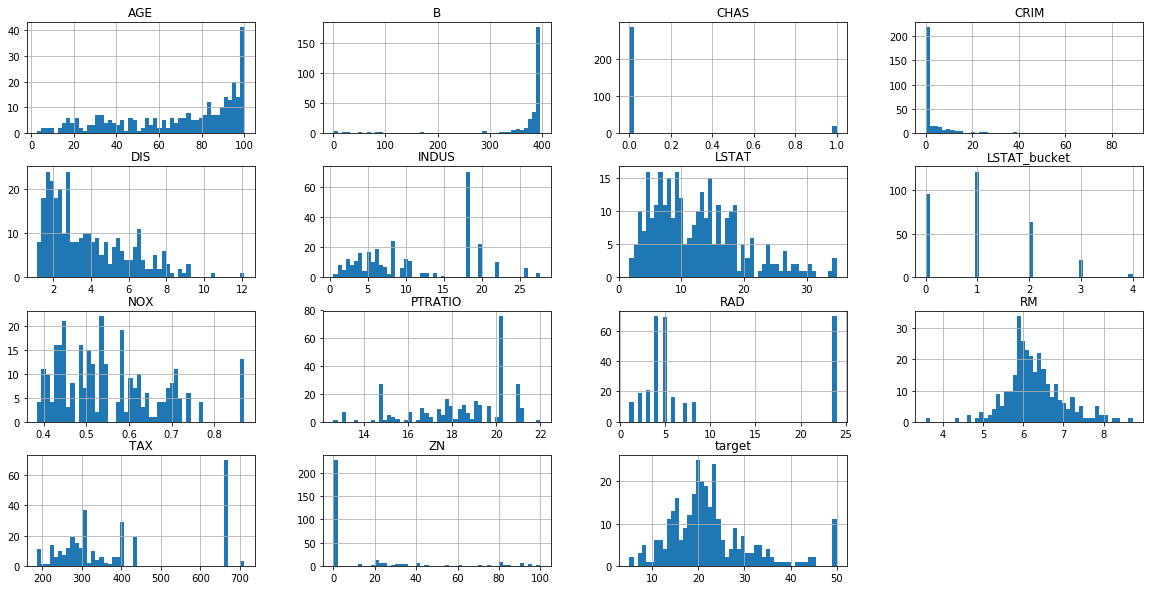

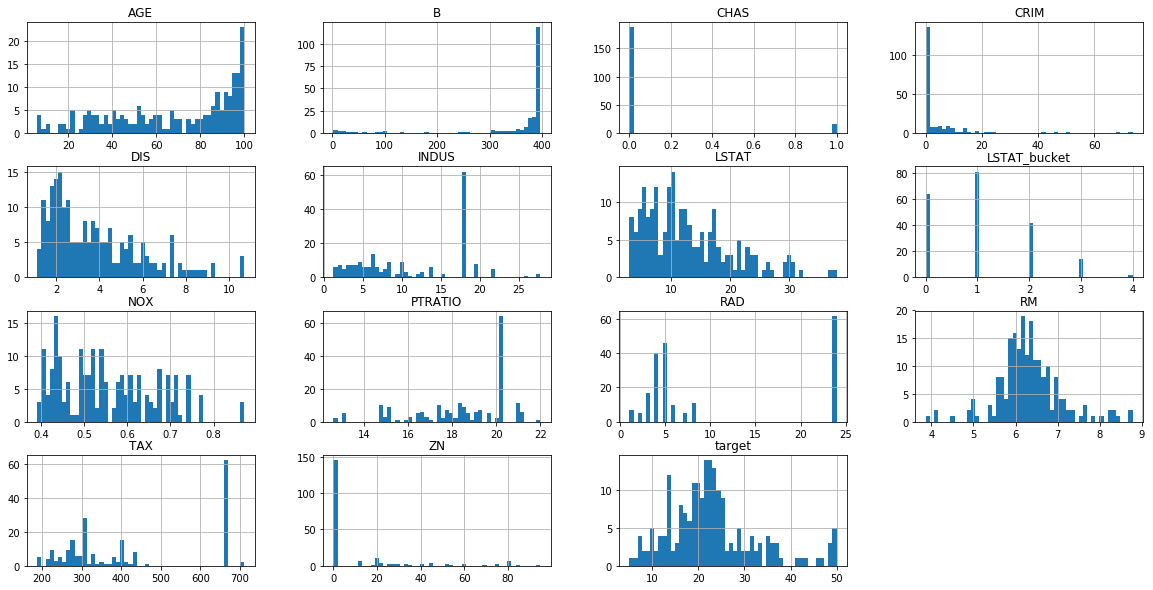

In [233]:
# 分层抽样
# 参数stratify即用来指定按照某一特征进行分层抽样
# 该参数值不能为浮点数
df['LSTAT_bucket'] = [i//8 for i in df['LSTAT']]
train_set, test_set = train_test_split(df, test_size=0.4, stratify=df['LSTAT_bucket'])
train_set.hist(bins=50, figsize=(20, 10))
plt.show()
test_set.hist(bins=50, figsize=(20, 10))
plt.show()
del df['LSTAT_bucket']

In [234]:
features = train_set.columns.tolist()
features.remove('target')

train_x = pd.DataFrame(train_set, columns=features)
train_y = pd.DataFrame(train_set, columns=['target'])

test_x = pd.DataFrame(test_set, columns=features)
test_y = pd.DataFrame(test_set, columns=['target'])

model = lr()
model.fit(train_x, train_y)
print(model.coef_, model.intercept_)

pred_y = model.predict(train_x)
print("训练误差：", mean_squared_error(train_y, pred_y))

pred_y = model.predict(test_x)
print("测试误差：", mean_squared_error(test_y, pred_y))

[[-1.58547446e-01  5.82483387e-02  7.12563479e-02  2.69325219e+00
  -1.82881338e+01  3.58845577e+00 -7.88260144e-03 -1.66879720e+00
   3.39786185e-01 -1.31213986e-02 -9.04902115e-01  1.04513325e-02
  -6.52727944e-01  8.35661915e-01]] [38.41077973]
训练误差： 20.97974624258308
测试误差： 23.900126496451918


## 4. 尝试更多的回归模型

### 4.1 Lasso套索回归

重要参数：

- alpha：L1正则项系数。当 alpha=0 时，相当于普通的线性回归算法。
- max_iter：最大迭代次数。

In [224]:
from sklearn.linear_model import Lasso

# 查看算法参数
Lasso?

In [235]:
train_set, test_set = train_test_split(df, test_size=0.4, random_state=2)
features = train_set.columns.tolist()
features.remove('target')

train_x = pd.DataFrame(train_set, columns=features)
train_y = pd.DataFrame(train_set, columns=['target'])

test_x = pd.DataFrame(test_set, columns=features)
test_y = pd.DataFrame(test_set, columns=['target'])

model = Lasso()
model.fit(train_x, train_y)
print(model.coef_, model.intercept_)

pred_y = model.predict(train_x)
print("训练误差：", mean_squared_error(train_y, pred_y))

pred_y = model.predict(test_x)
print("测试误差：", mean_squared_error(test_y, pred_y))

[-0.05166469  0.03022753 -0.          0.         -0.          0.41479709
  0.03213709 -0.40443259  0.2025391  -0.009191   -0.82293362  0.01013298
 -0.8174845 ] [42.66860312]
训练误差： 25.8640661376963
测试误差： 32.97092082774301


### 4.2 Ridge岭回归

重要参数：

- alpha：L2正则化参数
- max_iter：最大迭代次数
- solver：求解器说明: 
  - 'auto': 根据数据类型自动选择求解器。
  - 'svd': 使用X的奇异值分解来计算岭回归系数。奇异矩阵比'cholesky'更稳定。
  - 'cholesky': 使用标准的scipy.linalg.solve函数来获得封闭形式的解决方案。
  - 'sparse_cg': 使用scipy.sparse.linalg.cg中的共轭渐变求解器。作为一种迭代算法，这个求解器比'cholesky'更适合大规模数据（可能需要设置`tol`和`max_iter`参数）。
  - 'lsqr': 用专用的正则化最小二乘例程scipy.sparse.linalg.lsqr。
  - 'sag'/'saga': 'sag'使用随机平均梯度下降，'saga'使用其改进的，无偏见的版本SAGA。两种方法也使用迭代过程，并且当n_samples和n_features都很大时，它们通常比其他求解器更快。请注意，“sag”和“saga”快速收敛仅在具有大致相同比例的要素上得到保证。您可以使用sklearn.preprocessing中的缩放器预处理数据。
  - 所有五个求解器都支持密集和稀疏数据。但是，当`fit_intercept`为True时，只有'sag'和'saga'支持稀疏输入。

In [ ]:
from sklearn.linear_model import Ridge
Ridge?

In [237]:
train_set, test_set = train_test_split(df, test_size=0.4, random_state=2)
features = train_set.columns.tolist()
features.remove('target')

train_x = pd.DataFrame(train_set, columns=features)
train_y = pd.DataFrame(train_set, columns=['target'])

test_x = pd.DataFrame(test_set, columns=features)
test_y = pd.DataFrame(test_set, columns=['target'])

model = Ridge()
model.fit(train_x, train_y)
print(model.coef_, model.intercept_)

pred_y = model.predict(train_x)
print("训练误差：", mean_squared_error(train_y, pred_y))

pred_y = model.predict(test_x)
print("测试误差：", mean_squared_error(test_y, pred_y))

[[-1.06421449e-01  3.04615685e-02 -3.72954121e-02  2.80001399e+00
  -5.60327066e+00  3.12012436e+00  3.44580483e-03 -1.07692863e+00
   2.58080538e-01 -9.28813831e-03 -1.00497142e+00  1.22066948e-02
  -6.10593286e-01]] [33.29914766]
训练误差： 21.52077243519739
测试误差： 24.788784114090408


### 4.3 ElasticNet弹性网络

In [239]:
from sklearn.linear_model import ElasticNet
ElasticNet?

In [240]:
train_set, test_set = train_test_split(df, test_size=0.4, random_state=2)
features = train_set.columns.tolist()
features.remove('target')

train_x = pd.DataFrame(train_set, columns=features)
train_y = pd.DataFrame(train_set, columns=['target'])

test_x = pd.DataFrame(test_set, columns=features)
test_y = pd.DataFrame(test_set, columns=['target'])

model = ElasticNet()
model.fit(train_x, train_y)
print(model.coef_, model.intercept_)

pred_y = model.predict(train_x)
print("训练误差：", mean_squared_error(train_y, pred_y))

pred_y = model.predict(test_x)
print("测试误差：", mean_squared_error(test_y, pred_y))

[-0.0713417   0.03574521 -0.01498883  0.         -0.          0.75075262
  0.02772151 -0.5688266   0.23657538 -0.01059008 -0.81505791  0.0106298
 -0.79018147] [41.24396067]
训练误差： 24.899386585262857
测试误差： 31.23788270727111


### 4.4 SVM回归

重要参数：

- kernel：选择SVM算法的 kernel。可选项有 'linear', 'poly', 'rbf', 'sigmoid'和 'precomputed', 默认值为'rbf'。
- degree：当 kernel 选择 poly 时有用，指定多项式的次数。
- gamma：'rbf', 'poly' and 'sigmoid'的 kernel 系数。
- coef0：当 kernel 选择 poly 或者 sigmoid 时有用。
- C：惩罚参数C

In [241]:
from sklearn.svm import SVR
SVR?

In [244]:
train_set, test_set = train_test_split(df, test_size=0.4, random_state=2)
features = train_set.columns.tolist()
features.remove('target')

train_x = pd.DataFrame(train_set, columns=features)
train_y = pd.DataFrame(train_set, columns=['target'])

test_x = pd.DataFrame(test_set, columns=features)
test_y = pd.DataFrame(test_set, columns=['target'])

model = SVR()
model.fit(train_x, train_y)
# print(model.coef_, model.intercept_)     # coef_ is only available when using a linear kernel

pred_y = model.predict(train_x)
print("训练误差：", mean_squared_error(train_y, pred_y))

pred_y = model.predict(test_x)
print("测试误差：", mean_squared_error(test_y, pred_y))

训练误差： 62.41171375631481
测试误差： 102.67946857464761


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## 5. 课后作业

假设你是加利福尼亚州的某房产公司的一名数据分析师，现在你收到的任务是建立一个模型，能够通过房价历史数据，通过给予的一系列特征来预测加州任意地区房价中位数。

假设数据我们已经收集好了，在：../datasets/housing.csv，数据集字段说明：

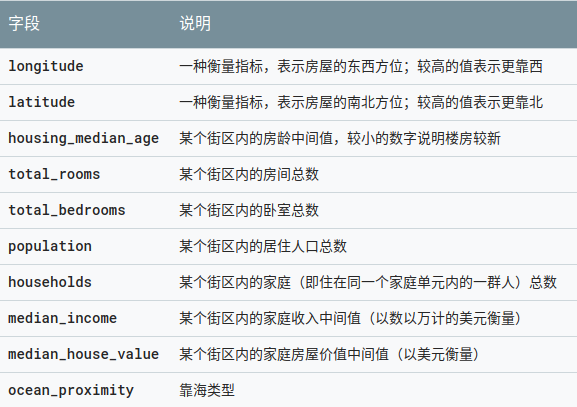

为了完成这个工作，你需要完成以下任务：

1. 统计说明数据集的基本情况
2. 数据集是否有缺失值，完成缺失值处理
3. 数据是否需要进行特征工程，例如是否有类别字段，如果有则需要进行特征工程
4. 对特征和目标字段进行相关性分析
5. 对数据集进行划分，并进行特征分析
7. 使用Ridge进行回归建模分析，完成模型调优，并将调试过程记录成一个表格。
8. 至少再多选一个算法（上面提到的算法之一）进行回归建模分析，完成调优，并将调试过程记录成一个表格。
9. 根据7和8得出最优的模型

对每一个算法，其模型调试过程表格参考：

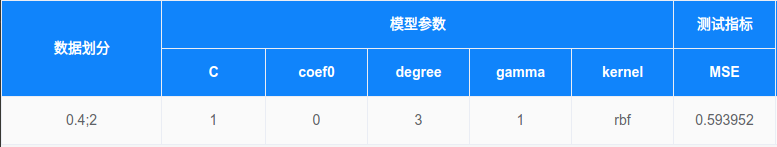

数据划分那里可以记录测试集比例，随机因子，如果基于某个特征做了均衡，还可以记录下字段名称。